In [1]:
import pandas as pd
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize  
import re
import matplotlib.pyplot as plt
import string
import tensorflow as tf
import tensorflow_addons as tfa
import pickle as pkl
from tensorflow.keras.preprocessing import sequence
import numpy as np
import seaborn as sns

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
with open("bank_classes.pkl", "rb") as f:
    bank_classes = pkl.load(f)

In [4]:
def preprocess(x): 
    
  '''
  Preprocessing steps:
  1. lower case
  2. expand contraction 
  3. remove puctuation
  4. lemetization
  5. removing stop words
  '''

  #lower case 
  x = str(x).lower()

  #expand contraction
  x = x.replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("'ll", " will")

  #remove puctuation
  #https://stackoverflow.com/questions/34293875/how-to-remove-punctuation-marks-from-a-string-in-python-3-x-using-translate
  x=re.sub('['+string.punctuation+']',"",x)

  #lemetization of sentence
  #Lemmatisation in linguistics is the process of grouping together the inflected forms of a word so they can be analysed as a single item
  #Lemmatisation is better then stemming since it doesn't chop of the remaining part
  word_tokens = word_tokenize(x) 
  lemmatizer = nltk.stem.WordNetLemmatizer()
  lemetized_string=[lemmatizer.lemmatize(w) for w in word_tokens]
  x = ' '.join(lemetized_string)  

  #removing stop words
  stop_words=set(stopwords.words('english'))
  word_tokens = word_tokenize(x) 
  filtered_sentence = [w for w in word_tokens if not w in stop_words]
  x = ' '.join(filtered_sentence)  


  return x

In [5]:
preprocessed_text=preprocess("I am still waiting on my card?")

In [6]:
preprocessed_text

'still waiting card'

In [7]:
with open("tokenizer.pkl", "rb") as f:
    tokenizer = pkl.load(f)

In [8]:
tokenized_text=tokenizer.texts_to_sequences([preprocessed_text])

In [9]:
max_length=14
tokenized_padded_text=sequence.pad_sequences(tokenized_text,maxlen=max_length,padding='post')

In [10]:
tokenized_padded_text

array([[ 30, 131,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0]])

In [11]:
model = tf.keras.models.load_model('my_model.h5')

In [12]:
output_score=model.predict(tokenized_padded_text)

In [13]:
max(output_score[0])

0.7899732

In [14]:
np.where(output_score[0] == 0.7899732)

(array([12], dtype=int64),)

In [15]:
bank_classes

array(['Refund_not_showing_up', 'activate_my_card', 'age_limit',
       'apple_pay_or_google_pay', 'atm_support', 'automatic_top_up',
       'balance_not_updated_after_bank_transfer',
       'balance_not_updated_after_cheque_or_cash_deposit',
       'beneficiary_not_allowed', 'cancel_transfer',
       'card_about_to_expire', 'card_acceptance', 'card_arrival',
       'card_delivery_estimate', 'card_linking', 'card_not_working',
       'card_payment_fee_charged', 'card_payment_not_recognised',
       'card_payment_wrong_exchange_rate', 'card_swallowed',
       'cash_withdrawal_charge', 'cash_withdrawal_not_recognised',
       'change_pin', 'compromised_card', 'contactless_not_working',
       'country_support', 'declined_card_payment',
       'declined_cash_withdrawal', 'declined_transfer',
       'direct_debit_payment_not_recognised', 'disposable_card_limits',
       'edit_personal_details', 'exchange_charge', 'exchange_rate',
       'exchange_via_app', 'extra_charge_on_statement', 'fai

In [16]:
df = pd.DataFrame(list(zip(bank_classes, output_score[0])), 
               columns =['Classes', 'Score']) 

In [17]:
df.head()

,Classes,Score
0,Refund_not_showing_up,0.000311
1,activate_my_card,0.000581
2,age_limit,0.000002
3,apple_pay_or_google_pay,0.000002
4,atm_support,0.000016


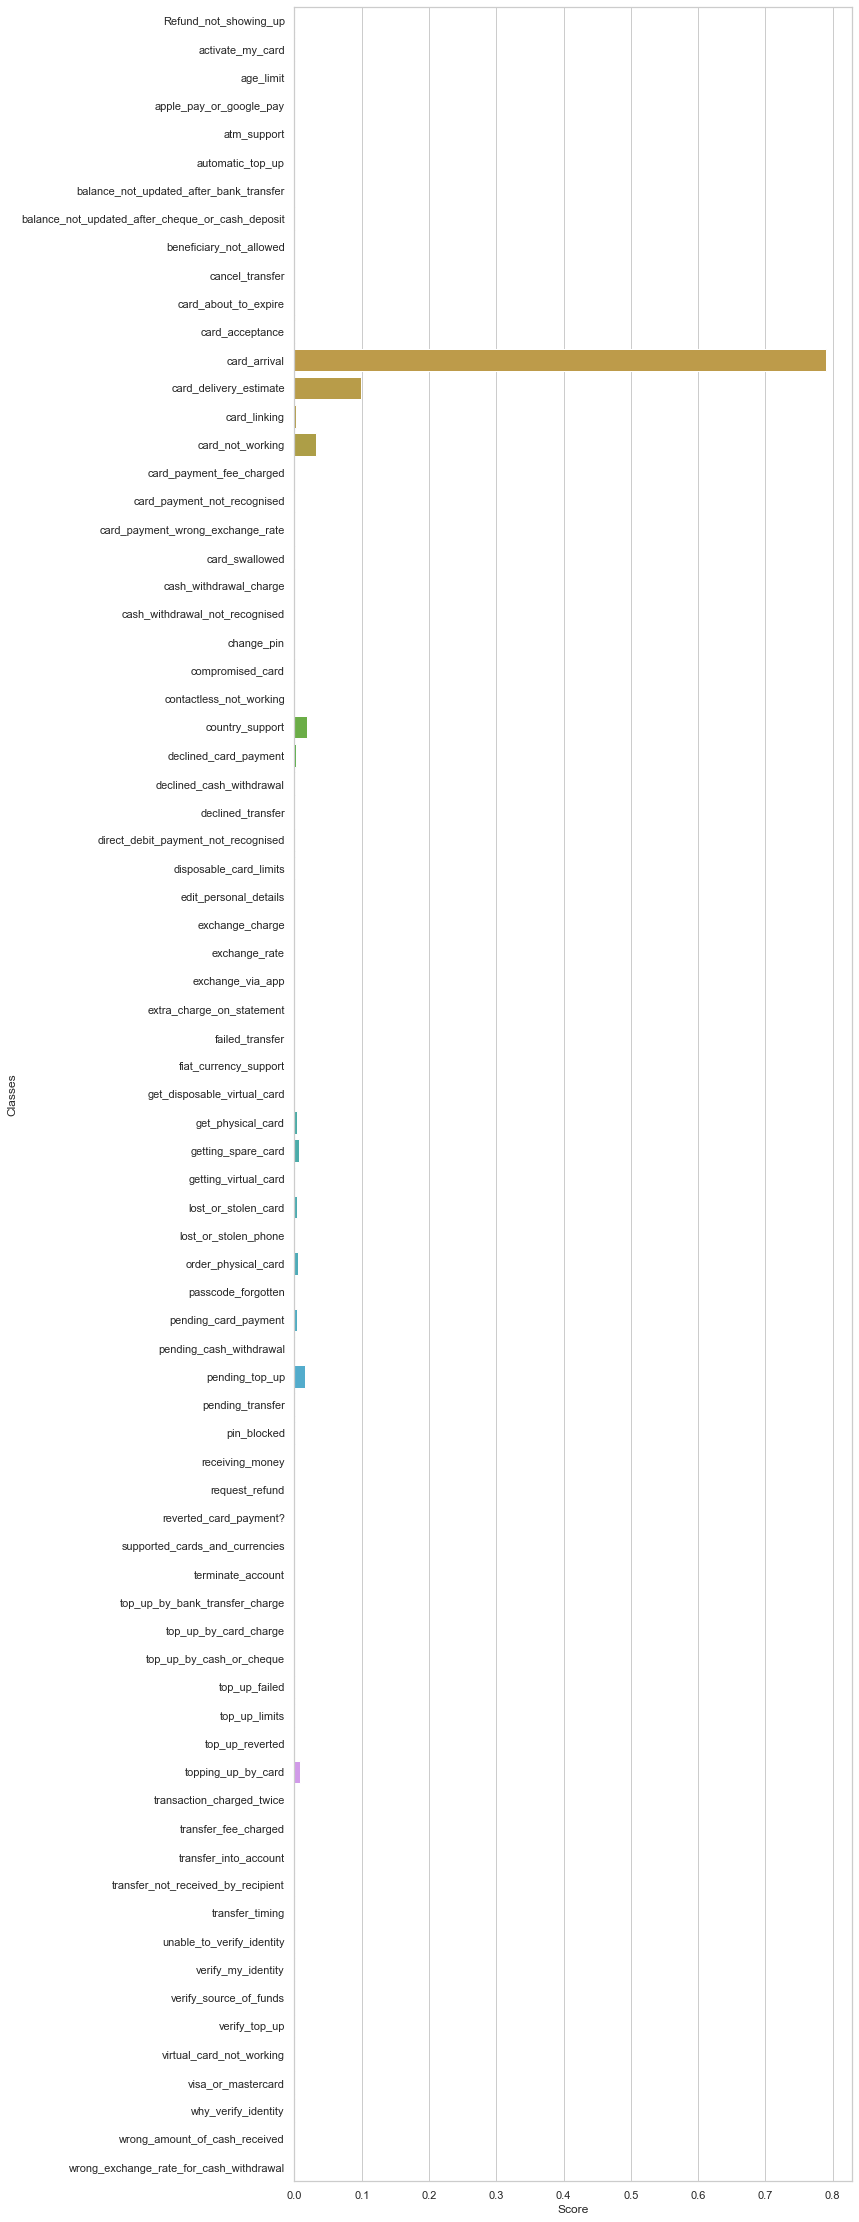

In [23]:
fig, ax = plt.subplots(figsize=(10,40))
ax=sns.set_theme(style="whitegrid")
ax=sns.barplot(x = 'Score',
            y = 'Classes',
            data = df)